# Hacktiv8 Phase 0: Graded Challenge 2

---

## Introduction

Name : [Salman Faishal](https://github.com/salmanfaishal27)

Batch : 017

## Description

### Objective

- menentukan apakah tempat pembuangan akhir di Austin harus diambah atau tidak
- membuat prediksi untuk hari selanjutnya

### Problem Statement

Pemerintah Austin ingin mengetahui apakah daerahnya harus manambah tempat untuk pembuangan akhir atau tidak dan pemerintah austin ingin mengetahui prediksi berat sampah untuk hari berikutnya 

## Working Area

```
SELECT report_date,load_time,load_type,load_weight,dropoff_site FROM bigquery-public-data.austin_waste.waste_and_diversion
WHERE report_date >= "2021-01-01" and report_date < '2022-01-01' 
```

## Import Library

Mengimport library yang akan digunakan, dalam project ini library yang digunakan pandas dan matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import seaborn as sns
from scipy import stats

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option("display.max.columns", None)

## Data Loading

membuat data frame dari file ```h8dsft_P0GC2_Salman_Faishal.csv```

In [3]:
df = pd.read_csv('h8dsft_P0GC2_Salman_Faishal.csv')

Menampilkan 5 data pertama dari dataframe ```h8dsft_P0GC2_Salman_Faishal.csv```

In [4]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


Menampilkan 5 data terakhir dari dataframe ```h8dsft_P0GC2_Salman_Faishal.csv```

In [5]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


## Data Characteristic

Menampilkan bentuk dataframe

In [6]:
df.shape

(26157, 5)

dataset ini memiliki 26167 baris dan 5 kolom

Menampilkan info dari dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


Dataset ini terdiri dari

- 4 kolom dengan tipe data object
- 1 kolom dengan tipe data float

dari info tersebut terdapat kolom load_weight yang terdapat missing value

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
load_weight,25109.0,12227.136307,7135.059565,0.0,7060.0,11300.0,16380.0,245540.0


Dari hasil di atas kita dapat melihat summary statistics dari kolom dataframe dengan tipe data numeric seperti rata-rata, standar deviasi, quartile, nilai minimum, dan nilai maksimum.

## Data Cleaning

### Missing Value

In [9]:
df.isna().sum() # Menampilkan jumalah dari value yang kosong

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

In [10]:
df = df.dropna() # Menghapus missing value yang ada pada dataframe

In [11]:
df.isna().sum() # Melihat jumlah missing value yang terdapat pada dataframe

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

sudah tidak ada missing value pada dataframe setelah dilakukan drop

## Data Preprocessing

merubah type data dari kolom load_time dan report_date menjadi datetime

In [12]:
df['report_date'] = pd.to_datetime(df.report_date)
df['load_time'] = pd.to_datetime(df.load_time)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25109 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   report_date   25109 non-null  datetime64[ns]     
 1   load_time     25109 non-null  datetime64[ns, UTC]
 2   load_type     25109 non-null  object             
 3   load_weight   25109 non-null  float64            
 4   dropoff_site  25109 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ MB


setelah dilakukan perubahan dataset ini terdiri dari:

- 2 kolom dengan tipe data object
- 1 kolom dengan tipe data float
- 2 klom dengan tipe data datetime

dari info tersebut sudah tidak terdapat missing value pada semua kolom

## Data Exploration

In [14]:
df.report_date.agg(('min','max'))

min   2021-01-02
max   2021-07-09
Name: report_date, dtype: datetime64[ns]

dataframe ini berisi rentang waktu dari 2021-01-02 sampai 2021-07-09

In [15]:
df.load_type.value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

menampilkan seluruh kolom load_type

In [16]:
df.dropoff_site.value_counts()

TDS LANDFILL             10691
ORGANICS BY GOSH          5741
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1652
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

menampilkan seluruh kolom dropoff_site

In [17]:
df.groupby(df.dropoff_site).load_weight.skew()

dropoff_site
AUSTIN IRON AND METAL    0.896963
AUSTIN WOOD RECYCLING         NaN
BALCONES RECYCLING       0.101482
BALCONES WOODS                NaN
GREAT NORTHERN          -1.509010
HORNSBY BEND             0.743034
MRF                      4.772560
ON ROUTE HIGH DUMP      -0.876144
ORGANICS BY GOSH         0.058561
PARK BEND                0.544438
STEINER LANDFILL              NaN
TDS - MRF                0.141616
TDS LANDFILL             3.694886
WESTFIELD                     NaN
Name: load_weight, dtype: float64

menampilkan seluruh kolom dropoff_site dengan menampilkan nilai skewness dari masing masing value

nilai skewness pada load_weight: 3.335938213321684


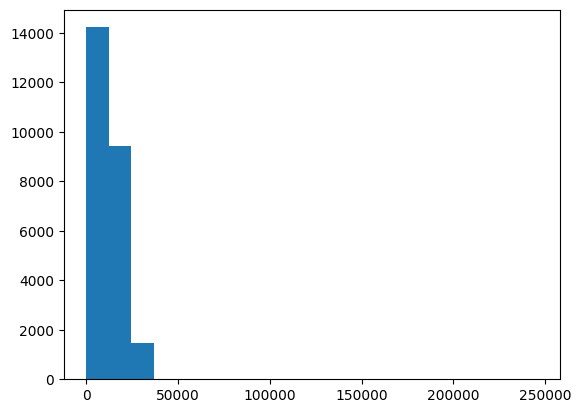

In [18]:
print(f'nilai skewness pada load_weight: {df.load_weight.skew()}') # Mempilkan nilai skewness
plt.hist(df.load_weight, bins=20) # Menampilkan sebaran data pada kolom load_weight
plt.show()

dari informasi diatas terdapat bentuk distribusi dan nilai skewness sebesar 3.3 maka bentuk distribusi ini adalah distribusi right skewness karena nilai skewness lebih dari 0.05

In [19]:
df.load_type.nunique() # Melihat jumlah value di kolom load_type

14

In [20]:
df.groupby(['dropoff_site','load_type'])[['load_weight']].sum() # Menampilkan jumlah load_weight berdasarkan grouping kolom dropoff_site dan load_type

load_weight
dropoff_site          load_type                              
AUSTIN IRON AND METAL RECYCLED METAL             2.256000e+04
AUSTIN WOOD RECYCLING RECYCLING - SINGLE STREAM  8.100000e+03
BALCONES RECYCLING    RECYCLING - SINGLE STREAM  3.631587e+07
BALCONES WOODS        RECYCLING - SINGLE STREAM  8.460000e+03
GREAT NORTHERN        GARBAGE COLLECTIONS        1.149200e+05
HORNSBY BEND          BRUSH                      9.421240e+06
                      GARBAGE COLLECTIONS        8.600000e+03
                      ORGANICS                   1.616000e+04
                      YARD TRIMMING              1.504520e+06
MRF                   BULK                       2.750000e+04
                      RECYCLED METAL             2.300000e+02
                      TIRES                      2.746670e+05
ON ROUTE HIGH DUMP    ORGANICS                   8.768000e+04
ORGANICS BY GOSH      DEAD ANIMAL                4.380000e+03
                      GARBAGE COLLECTIONS        7.500000e+03
                      ORGANICS                   6.774497e+07
                      RECYCLED METAL             6.266000e+04
                      SWEEPING                   3.040000e+04
PARK BEND             ORGANICS                   5.354000e+04
STEINER LANDFILL      GARBAGE COLLECTIONS        7.800000e+02
TDS - MRF             BULK                       1.976000e+04
                      GARBAGE COLLECTIONS        4.699000e+05
                      LITTER                     3.600000e+02
                      RECYCLING - SINGLE STREAM  2.861426e+07
TDS LANDFILL          BRUSH                      1.844000e+04
                      BULK                       1.289348e+07
                      CONTAMINATED ORGANICS      2.538000e+04
                      CONTAMINATED RECYCLING     5.160000e+03
                      DEAD ANIMAL                2.027000e+04
                      GARBAGE COLLECTIONS        1.445301e+08
                      LITTER                     1.283200e+05
                      MIXED LITTER               1.051780e+06
                      ORGANICS                   2.802000e+04
                      RECYCLED METAL             2.200000e+02
                      RECYCLING - SINGLE STREAM  7.740000e+03
                      SWEEPING                   3.432080e+06
                      TIRES                      3.512000e+04
WESTFIELD             GARBAGE COLLECTIONS        1.602000e+04

In [21]:
df.groupby(['dropoff_site'])[['load_weight']].sum()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,2.256000e+04
AUSTIN WOOD RECYCLING,8.100000e+03
BALCONES RECYCLING,3.631587e+07
BALCONES WOODS,8.460000e+03
GREAT NORTHERN,1.149200e+05
HORNSBY BEND,1.095052e+07
MRF,3.023970e+05
ON ROUTE HIGH DUMP,8.768000e+04
ORGANICS BY GOSH,6.784991e+07


In [22]:
df_site = df[df.dropoff_site == 'TDS LANDFILL'] # Membuat variabel df_site yang berisi dataframe yang berisi dropoff_site bervalue TDS LANDFILL

Pada kasus ini site yang saya pilih adalah TDS LANDFILL, site ini menarik karena pada site ini memiliki paling banyak load_type, bukan hanya memiliki berbagai load_type tetapi memiliki load_weight yang rendah.

In [23]:
df_site.load_weight.skew() # Melihat nilai skewness dari dataframe df_site

3.6948860857622075

<AxesSubplot: >

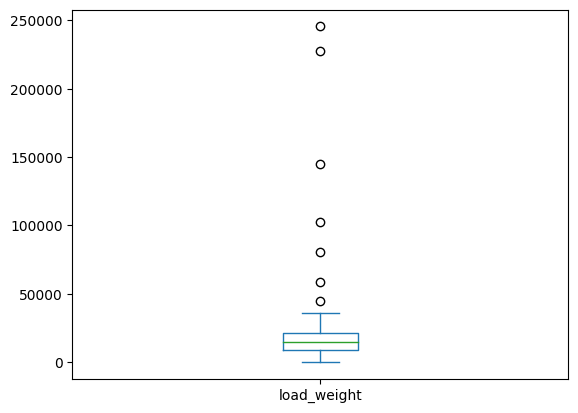

In [24]:
df_site.load_weight.plot(kind='box') # Menampilkan boxplot pada kolom load_weight pada dataframe df_site

Dari boxplot diatas terlihat tedapat outlier pada dataframe df_site kolom load_weight

In [25]:
print(f'Mean dengan data masih ada outlier: ',df_site.load_weight.mean()) # Menampilkan mean kolom load_weight pada dataframe df_site
print(f'median dengan data masih ada outlier: ',df_site.load_weight.median()) # Menampilkan median kolom load_weight pada dataframe df_site
print(f'Mode dengan data masih ada outlier: ',df_site.load_weight.mode()[0]) # Menampilkan mode kolom load_weight pada dataframe df_site

Mean dengan data masih ada outlier:  15169.407215358715
median dengan data masih ada outlier:  14920.0
Mode dengan data masih ada outlier:  20.0


## Outlier Removal

In [26]:
Q1 = df_site.load_weight.quantile(0.25) # Membuat variabel Q1 yang diisi oleh quartile 1 dari kolom load_weight
Q3 = df_site.load_weight.quantile(0.75) # Membuat variabel Q3 yang diisi oleh quartile 3 dari kolom load_weight
Q1, Q3 

(8820.0, 21660.0)

In [27]:
IQR = Q3 - Q1 # Membuat varabel IQR yang diisi oleh Q3 - Q1
IQR

12840.0

In [28]:
lower_limit = Q1 - 1.5*IQR # Membuat variabel lower_limit yang berisis Q1 dikurangi 1.5*IQR
upper_limit = Q3 + 1.5*IQR # Membuat variabel upper_limit yang berisis Q3 dikurangi 1.5*IQR
lower_limit, upper_limit

(-10440.0, 40920.0)

In [29]:
tdsl_with_outlier = df_site[(df_site.load_weight > upper_limit) | (df_site.load_weight < lower_limit)] # Membuat variabel tdsl_with_outlier
tdsl_with_outlier

,report_date,load_time,load_type,load_weight,dropoff_site
2381,2021-03-09,2021-03-09 01:30:00+00:00,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
5507,2021-03-29,2021-03-29 05:08:00+00:00,GARBAGE COLLECTIONS,58600.0,TDS LANDFILL
13632,2021-05-26,2021-05-26 11:40:00+00:00,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
13817,2021-05-27,2021-05-27 11:33:00+00:00,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
16964,2021-06-21,2021-06-21 01:05:00+00:00,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL
19960,2021-01-07,2021-01-07 02:45:00+00:00,GARBAGE COLLECTIONS,44980.0,TDS LANDFILL
24239,2021-02-09,2021-02-09 01:08:00+00:00,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL


Pada data diatas terdapat data yang berisikan outlier pada dataframe df_site

In [30]:
tdsl_with_outlier.shape[0]/len(df_site)*100

0.0654756337105977

In [31]:
tdsl_without_outlier = df_site[(df_site.load_weight < upper_limit) & (df_site.load_weight > lower_limit)] # Membuat variabel tdsl_without_outlier
tdsl_without_outlier


,report_date,load_time,load_type,load_weight,dropoff_site
383,2021-01-23,2021-01-23 11:12:00+00:00,BULK,9940.0,TDS LANDFILL
384,2021-01-23,2021-01-23 01:10:00+00:00,BULK,1960.0,TDS LANDFILL
385,2021-01-23,2021-01-23 12:31:00+00:00,BULK,10760.0,TDS LANDFILL
386,2021-01-23,2021-01-23 12:58:00+00:00,BULK,3920.0,TDS LANDFILL
387,2021-01-23,2021-01-23 12:25:00+00:00,BULK,13580.0,TDS LANDFILL
...,...,...,...,...,...
26110,2021-03-01,2021-03-01 01:04:00+00:00,SWEEPING,7280.0,TDS LANDFILL
26111,2021-03-01,2021-03-01 12:57:00+00:00,SWEEPING,4320.0,TDS LANDFILL
26112,2021-03-01,2021-03-01 01:40:00+00:00,RECYCLING - SINGLE STREAM,5320.0,TDS LANDFILL
26113,2021-03-01,2021-03-01 03:44:00+00:00,BULK,3660.0,TDS LANDFILL


Pada dara diatas terdapat data yang sudah tidak ada outlier pada dataframe df_site

In [32]:
print(f'Mean setelah dihapus outlier: ',tdsl_without_outlier.load_weight.mean()) # Menampilkan mean kolom load_weight pada dataframe tdsl_without_outlier
print(f'median setelah dihapus outlier: ',tdsl_without_outlier.load_weight.median()) # Menampilkan median kolom load_weight pada dataframe tdsl_without_outlier
print(f'Mode setelah dihapus outlier: ',tdsl_without_outlier.load_weight.mode()[0]) # Menampilkan mode kolom load_weight pada dataframe tdsl_without_outlier

Mean setelah dihapus outlier:  15094.59898347061
median setelah dihapus outlier:  14920.0
Mode setelah dihapus outlier:  20.0


## Measure of Variance

In [33]:
print(f'range sebelum dihapus outlier: ',(df_site.load_weight.max() - df_site.load_weight.min())) # Menampilkan range kolom load_weight pada dataframe df_site sebelum dihapus outlier
print(f'vairan sebelum dihapus outlier: ',df_site.load_weight.var()) # Menampilkan varian kolom load_weight pada dataframe df_site sebelum dihapus outlier
print(f'standar deviasi sebelum dihapus outlier: ',df_site.load_weight.std()) # Menampilkan standar deviasi kolom load_weight pada dataframe df_site sebelum dihapus outlier

range sebelum dihapus outlier:  245540.0
vairan sebelum dihapus outlier:  73805784.13769622
standar deviasi sebelum dihapus outlier:  8591.029282786563


In [34]:
print(f'range setelah dihapus outlier: ',(tdsl_without_outlier.load_weight.max() - tdsl_without_outlier.load_weight.min())) # Menampilkan range kolom load_weight pada dataframe df_site setelah dihapus outlier
print(f'varian setelah dihapus outlier: ',tdsl_without_outlier.load_weight.var()) # Menampilkan varian kolom load_weight pada dataframe df_site setelah dihapus outlier
print(f'standar deviasi setelah dihapus outlier: ',tdsl_without_outlier.load_weight.std()) # Menampilkan standar deviasi kolom load_weight pada dataframe df_site setelah dihapus outlier

range setelah dihapus outlier:  35900.0
varian setelah dihapus outlier:  61689203.067723714
standar deviasi setelah dihapus outlier:  7854.247453940047


In [35]:
ci = stats.norm.interval(0.90, df_site.load_weight.mean(), df_site.load_weight.std()) # Membuat variabel ci yang berisikan confidence interval
print(f'Confidence Interval dari site TDS LANDFILL adalah: {ci}')

Confidence Interval dari site TDS LANDFILL adalah: (1038.4215403209255, 29300.3928903965)


In [36]:
hipo_test = df['load_weight'].groupby(df.load_time).sum() # Membuat variabel hipo_test
print('Rata-rata load weight dari 2021-01-02 sampai 2021-07-09 adalah: ',hipo_test.mean()) # Menampilkan mean dari variabel hipo_test

Rata-rata load weight dari 2021-01-02 sampai 2021-07-09 adalah:  15788.694550753406


Hipotesis pada kasus ini

- H0: μ <= 10000
- H1: μ > 10000

In [37]:
t_stat,p_val = stats.ttest_1samp(hipo_test.reset_index().load_weight, 10000) # Mwnghitung t_stat dan p_val
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: 62.56266524581141


In [38]:
if p_val/2 <= 0.05:
    print('H0 Rejected')
else:
    print('H0 Fail to reject')

H0 Rejected


In [39]:
df_site.load_weight.mean()

15169.407215358715

Dari hasil uji hipotesis didapatkan null hipotesis ditolak dimana rata rata load weight TDS LANDFILL lebih dari 10000 Kg, jadi pemerintah memerlukan tambahan kapasitas tambahan di TDS LANDFILL

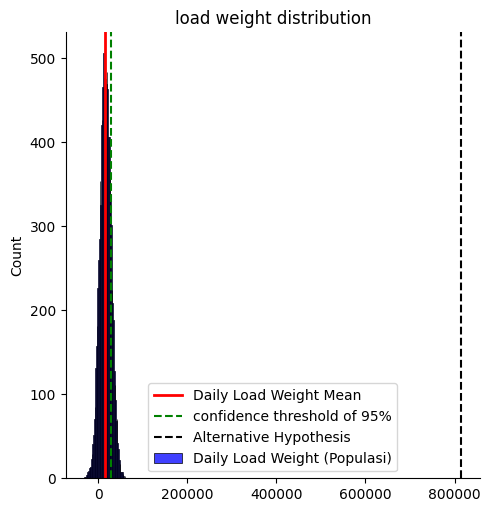

In [40]:
load_weight_pop = np.random.normal(hipo_test.mean(),hipo_test.std(),10000)

ci = stats.norm.interval(0.90,df_site.load_weight.mean(),df_site.load_weight.std())

sns.displot(load_weight_pop, label = 'Daily Load Weight (Populasi)',color='blue')
plt.axvline(df_site.load_weight.mean(), linewidth=2, color='r', label='Daily Load Weight Mean')
plt.axvline(ci[1], color = 'green',linestyle = 'dashed', label = 'confidence threshold of 95%' )
plt.axvline(load_weight_pop.mean() + t_stat*load_weight_pop.std(),color = 'black',linestyle = 'dashed', label = 'Alternative Hypothesis')
plt.title('load weight distribution')
plt.legend()
plt.show()


## Problem 2

In [41]:
dated = df.groupby('report_date').load_weight.sum().reset_index().sort_values(by = 'report_date') # Membuat variabel dated yang berisi dataframe yang sudah di filetr

In [42]:
dated

,report_date,load_weight
0,2021-01-02,2170130.0
1,2021-01-04,2920260.0
2,2021-01-05,2388540.0
3,2021-01-06,2396550.0
4,2021-01-07,2438330.0
...,...,...
160,2021-07-05,1897290.0
161,2021-07-06,1921640.0
162,2021-07-07,1553080.0
163,2021-07-08,1417650.0


dataframe diatas sudah difilter yang menampilkan report_date dan jumlah load_weight dari tiap report_date

In [43]:
def func_p(df):
    whari_ini = df[df.report_date == '2021-07-09'].load_weight
    v = np.gradient(dated.load_weight, dated.index)[-1]
    dt = 1
    return whari_ini + (v * dt)

fungsi yang dugunakan untuk menghitung prediksi

In [44]:
pred = pd.DataFrame({'report_date': '2021-07-10', 'load_weight': list(func_p(dated))}) # membuat variabel pred yang berisi prediksi yang sudah dihitung dari fungsi

In [45]:
pred

,report_date,load_weight
0,2021-07-10,-1176970.0


In [46]:
dated = df.groupby('report_date').load_weight.sum().reset_index().sort_values('report_date')
dated['report_date'] = dated.report_date.astype(str)
dated

,report_date,load_weight
0,2021-01-02,2170130.0
1,2021-01-04,2920260.0
2,2021-01-05,2388540.0
3,2021-01-06,2396550.0
4,2021-01-07,2438330.0
...,...,...
160,2021-07-05,1897290.0
161,2021-07-06,1921640.0
162,2021-07-07,1553080.0
163,2021-07-08,1417650.0


In [47]:
all = pd.concat([dated, pred]) # Menggabungkan prediksi kedalam dataframe dated

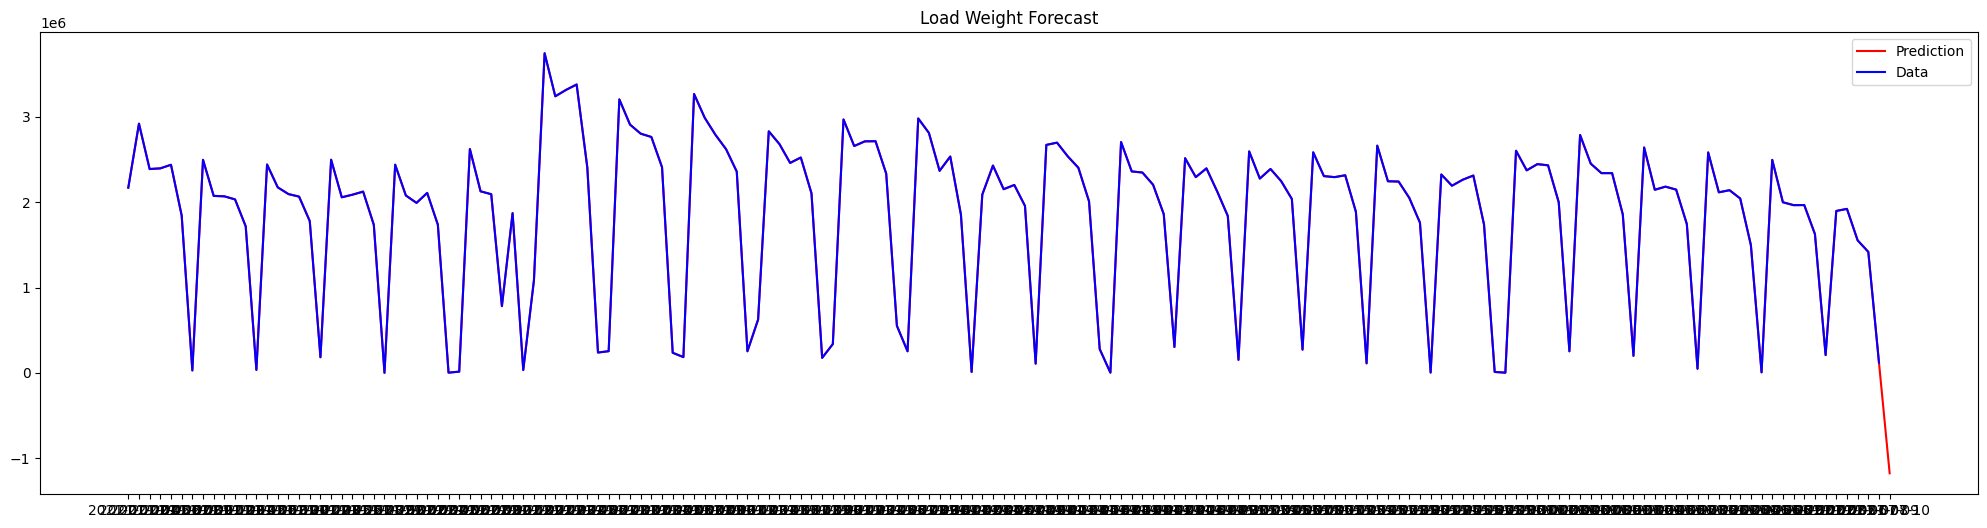

In [52]:
plt.figure(figsize=(25, 6))
plt.plot(all.report_date, all.load_weight, c='red', label='Prediction')
plt.plot(dated.report_date, dated.load_weight, c='blue', label='Data') 
plt.title('Load Weight Forecast')
plt.legend()
plt.show()

## Conclusions, Assumptions, Overall Analysis

### Problem 1

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

Teknik yang digunakan pada analisis ini adalah turkey's rule karena datanya terdistribusi skewed

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

pada soal no 7 membahas tentang confidence interval dimana untuk mencari confidence interval harus menginput parameter .stats.norm.interval yang ada pada modul scipy, parameter tersebut berisi nilai mean dan standar deviasi dari dataframe yang sudah dibuat baik itu sampel ataupun populasi, karena confidence interval menggunakan nilai mean dan standar deviasi yang tenyata nilai nilai tersebut adalah central tendency, maka confidence interval sangat erat kaitannya dengan central tendency

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Teknik yang digunakan pada hipotesis ini adalah single sample one tailed, karena data yang digunakan hanya kolom load_weight

### Problem 2

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

untuk menghitung turunan pertama saya menggunakan np.gradient, sehingga metode yang digunakan adalah simbolik.

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

iya, karena untuk mengetahui turunan pertama dari setiap baris saya harus menggunakan fungsi matematis yaitu np.gradient

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

Hasil prediksi load_weight untuk tanggal 10 july 2021 adalah -1176970 karena hasil prediksi bernilai negatif maka bisa disimpulkan untuk load_weight padaa tanggal 10 july 2021 adalah 0